In [11]:
%matplotlib inline

In [31]:
import os
import zipfile
import ibmseti
import pylab as plt%matplotlib inline
import numpy as np
plt.rcParams['font.size'] = 12

In [5]:
zz = zipfile.ZipFile(mydatafolder + '/' + 'basic4.zip')
basic4list = zz.namelist()[1:]
firstfile = basic4list[0]
aca = ibmseti.compamp.SimCompamp(zz.open(firstfile).read())
aca.header() # this shows the classification

{u'signal_classification': u'narrowbanddrd',
 u'uuid': u'001b4fbd-bfbc-49e0-83a8-8b3c5b8b303d'}

In [59]:
def plot_aca(filename, show=True):
    """ Plot a spectrogram file from filename """
    aca = ibmseti.compamp.SimCompamp(zz.open(filename).read())
    plt.figure(figsize=(10, 6))
    plt.imshow(aca.get_spectrogram(), aspect='auto', cmap='magma_r')
    plt.colorbar()
    plt.xlabel("Frequency channel")
    plt.ylabel("Time")
    signal_class = aca.header()["signal_classification"]
    uuid = aca.header()["uuid"]
    plt.title("%s: %s" % (signal_class, uuid))
    if show:
        plt.show()

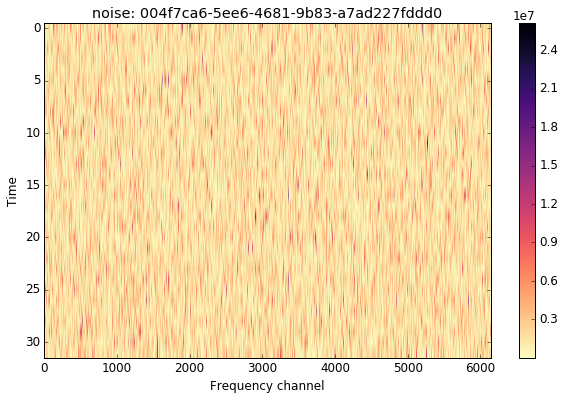

In [58]:
plot_aca(basic4list[2])

## Apply random algorithm as a test

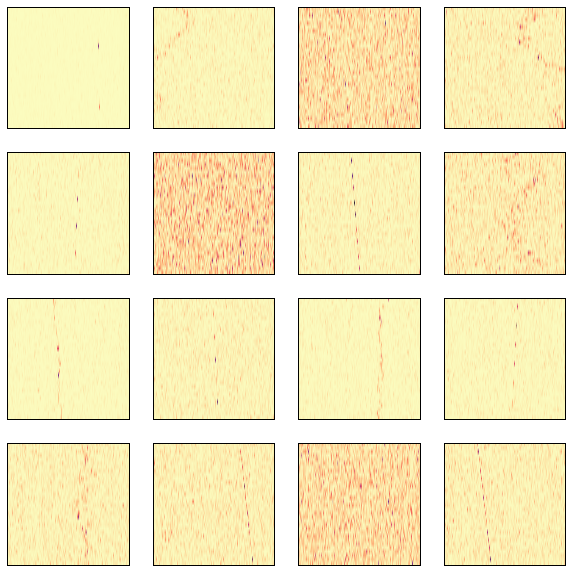

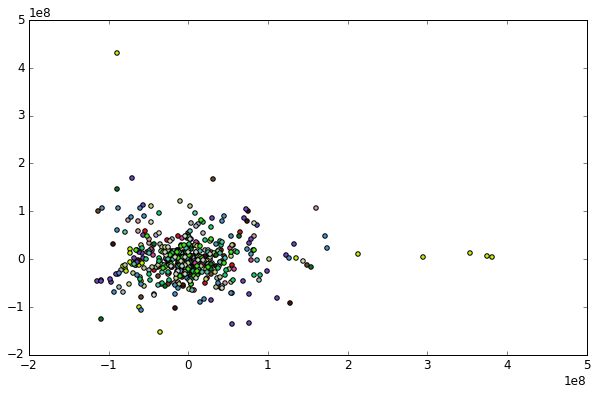

In [78]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=3)

def grab_data(filename):
    aca = ibmseti.compamp.SimCompamp(zz.open(filename).read())
    return aca.get_spectrogram()

n_files = 16        # Number of files to plot

# Plot config
n_col = int(np.ceil(np.sqrt(n_files)))
n_row = n_col
colors = zip(np.random.random(n_files), np.random.random(n_files), np.random.random(n_files))
plt.figure("data", figsize=(10, 10))
plt.figure("scatter", figsize=(10, 6))

# Loop and plot
for ii in range(n_files):
    d = grab_data(basic4list[ii])
    D = pca.fit_transform(d)
    plt.figure("data")
    plt.subplot(n_row, n_col, ii+1)
    plt.imshow(d, aspect='auto', cmap='magma_r')
    plt.xticks([])
    plt.yticks([])
    
    plt.figure("scatter")
    plt.scatter(D[:, 0], D[:, 1], c=colors[ii])

plt.show()